In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
results_dir = Path("useful_results")
csv_files = sorted(results_dir.glob("*.csv"))
print("Recent CSV files:")
for csv_file in csv_files:
    print(csv_file.name)

if not csv_files:
    print("No CSV files found in the directory.")

Recent CSV files:
2025-08-01_15:06:51_openai_o3_k3.csv
2025-08-02_05:07:03_gemini_gemini-2.5-pro_k3.csv
2025-08-03_03:27:30_openai_gpt-4o_k3.csv


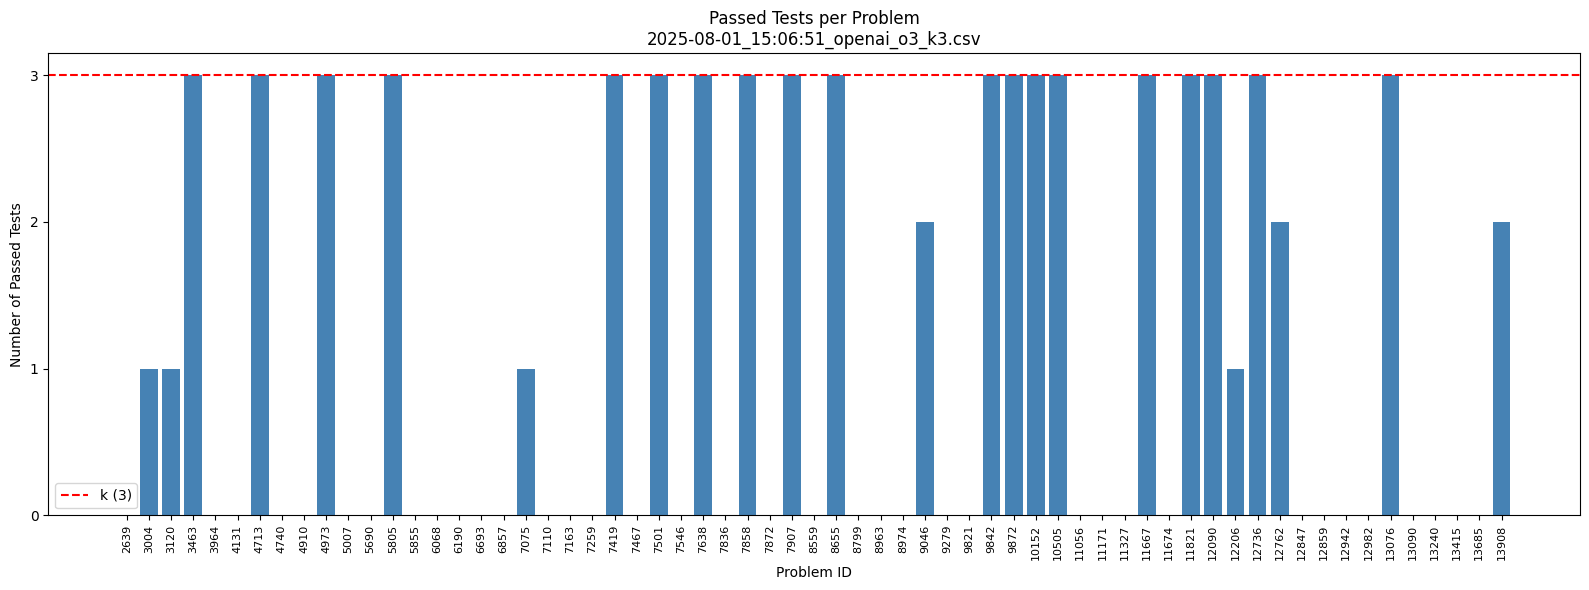

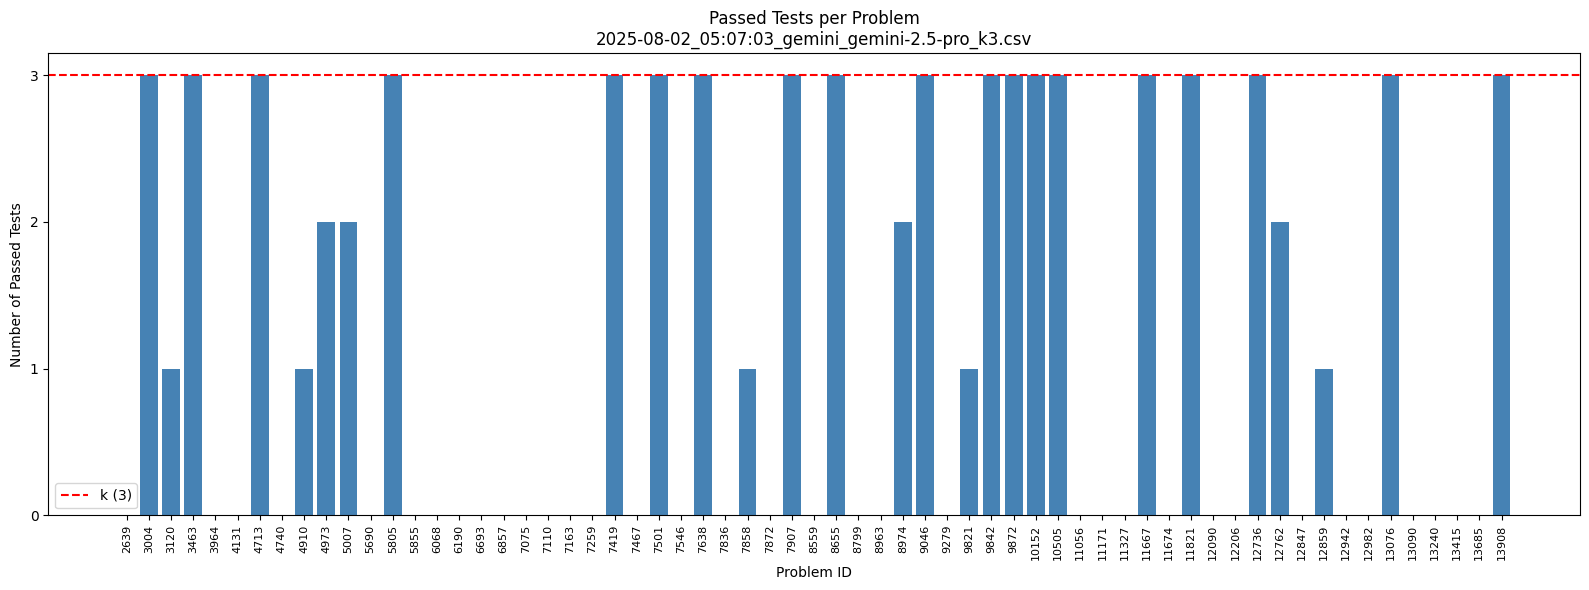

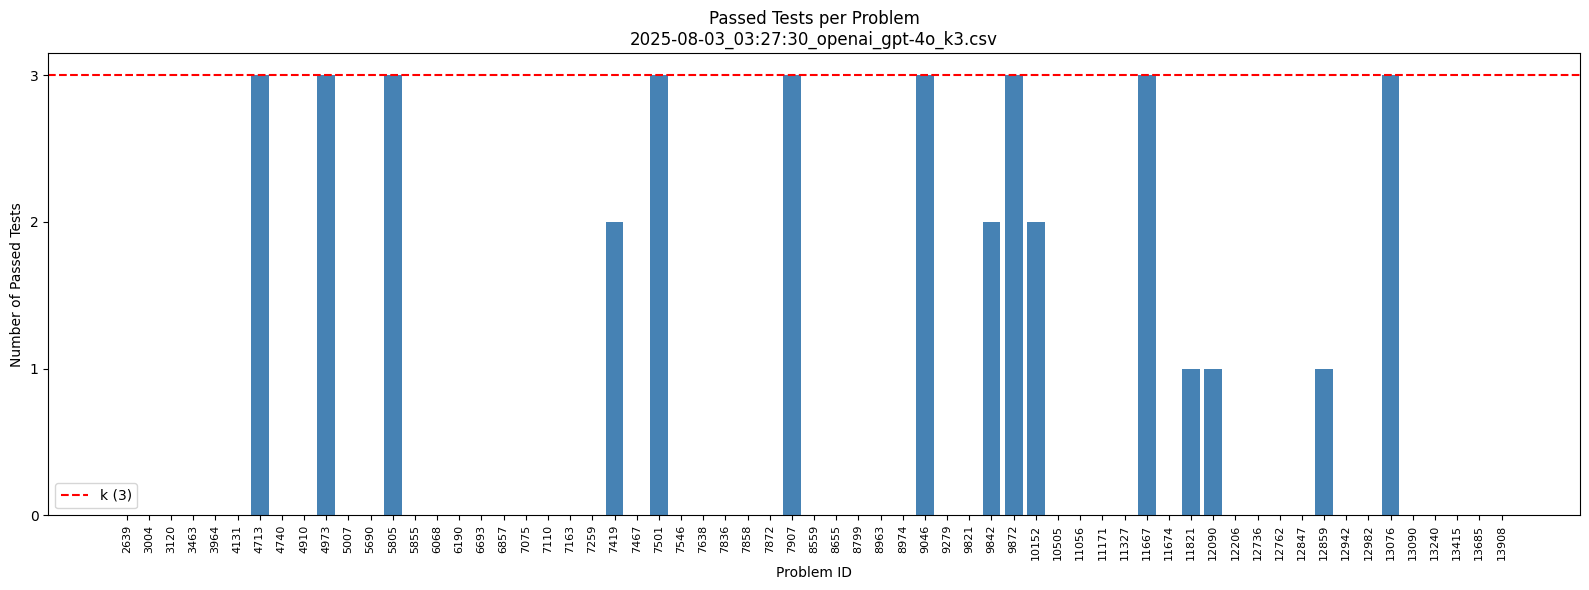

In [3]:
# Loop through each CSV file
for csv_path in csv_files:
    df = pd.read_csv(csv_path)
    df["problem"] = df["problem"].astype(str)

    # Plot passed_tests per problem
    plt.figure(figsize=(16, 6))
    plt.bar(df["problem"], df["passed_tests"], color="steelblue")

    # Horizontal line at total_generations
    max_gen = df["total_generations"].max()
    plt.axhline(y=max_gen, color="red", linestyle="--", label=f"k ({max_gen})")

    # Title includes file name
    plt.title(f"Passed Tests per Problem\n{csv_path.name}")
    plt.xlabel("Problem ID")
    plt.ylabel("Number of Passed Tests")
    plt.xticks(rotation=90, fontsize=8)
    plt.yticks(range(0, max_gen + 1))
    plt.legend()
    plt.tight_layout()
    plt.show()